# DNS Tunneling Queries Classification

## Data Loading

In [1]:
# Importing dataset via kaggle

!kaggle datasets download -d saurabhshahane/dns-tunneling-queries-classification

Dataset URL: https://www.kaggle.com/datasets/saurabhshahane/dns-tunneling-queries-classification
License(s): Attribution 4.0 International (CC BY 4.0)
100%|███████████████████████████████████████| 1.49M/1.49M [00:01<00:00, 996kB/s]
100%|███████████████████████████████████████| 1.49M/1.49M [00:01<00:00, 903kB/s]


In [2]:
# Exporting dataset from zipfile

import zipfile
zip_ref = zipfile.ZipFile('/home/bhxveshhh/ML/DNS Tunneling Queries Classification/dns-tunneling-queries-classification.zip', 'r')
zip_ref.extractall('/home/bhxveshhh/ML/DNS Tunneling Queries Classification')
zip_ref.close()

## Exploratory Data Analysis

In [22]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [23]:
df = pd.read_csv('training.csv')

In [24]:
df.head()

,1,q+Z8AnwaBA.hidemyself.org.
0,1,q+Z8A3wbBA.hidemyself.org.
1,1,q+Z8BHwcBA.hidemyself.org.
2,1,q+Z8BXwdBA.hidemyself.org.
3,1,q+Z8BnweCORdAGL4+W7DB5xH1cUwcwM1gejAQoJF8hbs2J...
4,1,q+Z8B3wfBA.hidemyself.org.


In [25]:
df.shape

(14999, 2)

In [26]:
df.size

29998

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 2 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   1                           14999 non-null  int64 
 1   q+Z8AnwaBA.hidemyself.org.  14999 non-null  object
dtypes: int64(1), object(1)
memory usage: 234.5+ KB


In [28]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
1,14999.0,0.799987,0.400023,0.0,1.0,1.0,1.0,1.0


In [29]:
df.isnull().sum()

1                             0
q+Z8AnwaBA.hidemyself.org.    0
dtype: int64

In [30]:
df.duplicated().sum()

np.int64(28)

In [31]:
df.nunique()

1                                 2
q+Z8AnwaBA.hidemyself.org.    14971
dtype: int64

In [32]:
df['1'].value_counts()

1
1    11999
0     3000
Name: count, dtype: int64

## Data Preprocessing

In [33]:
# Dropping duplicates

df.drop_duplicates(inplace=True)

In [34]:
# Renamming 1 to label

df.rename(columns={'1': 'label'}, inplace=True)

In [35]:
# Entropy Utility 

import math

def calculate_entropy(text):
    if not text: 
        return 0 
    entropy = 0
    for x in range(256): 
        p_x = float(text.count(chr(x)))/len(text) 
        if p_x > 0: 
            entropy += - p_x*math.log(p_x, 2) 
    return entropy

In [36]:
# Rename the second column to 'Query' for clarity

df.rename(columns={df.columns[1]: 'Query'}, inplace=True)

entropy_train_vals = []

for query in df['Query']:
    entropy = calculate_entropy(query)
    entropy_train_vals.append(entropy)
    
df['Entropy'] = entropy_train_vals


In [42]:
X = df['Entropy']
y = df['label'] 

In [43]:
# Train test split

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Model Building

In [44]:
from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [45]:
logistic_clf = LogisticRegression()
ridge_clf = RidgeClassifier()
xgboost_clf = XGBClassifier()
random_forest_clf = RandomForestClassifier()
ada_boost_clf = AdaBoostClassifier()
grad_boost_clf = GradientBoostingClassifier()
bagging_clf = BaggingClassifier()
decision_tree_clf = DecisionTreeClassifier()
svm_clf = SVC()

In [47]:
model_li = [logistic_clf, ridge_clf, xgboost_clf, random_forest_clf, 
            ada_boost_clf, grad_boost_clf, bagging_clf, decision_tree_clf, svm_clf]

# Reshape X_train and X_test to 2D arrays
X_train_reshaped = X_train.values.reshape(-1, 1)
X_test_reshaped = X_test.values.reshape(-1, 1)

scores = []
for model in model_li:
    model.fit(X_train_reshaped, y_train)
    scores.append(accuracy_score(y_test, model.predict(X_test_reshaped)))

print(scores)

[0.9679465776293823, 0.9078464106844741, 0.9889816360601001, 0.9956594323873121, 0.9712854757929883, 0.9939899833055091, 0.9956594323873121, 0.9956594323873121, 0.9649415692821369]


## Model Evaluation

Model: LogisticRegression
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.89      0.92       598
           1       0.97      0.99      0.98      2397

    accuracy                           0.97      2995
   macro avg       0.96      0.94      0.95      2995
weighted avg       0.97      0.97      0.97      2995

Confusion Matrix:
 [[ 530   68]
 [  28 2369]]


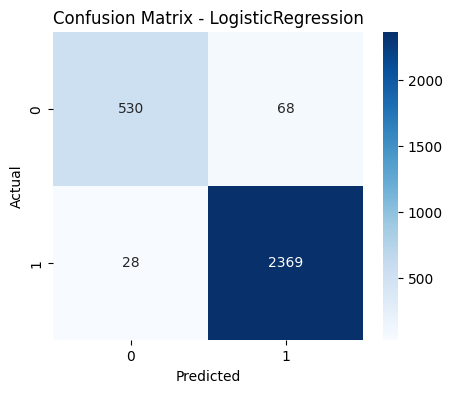

Model: RidgeClassifier
Classification Report:
               precision    recall  f1-score   support

           0       0.70      0.95      0.80       598
           1       0.99      0.90      0.94      2397

    accuracy                           0.91      2995
   macro avg       0.84      0.92      0.87      2995
weighted avg       0.93      0.91      0.91      2995

Confusion Matrix:
 [[ 567   31]
 [ 245 2152]]


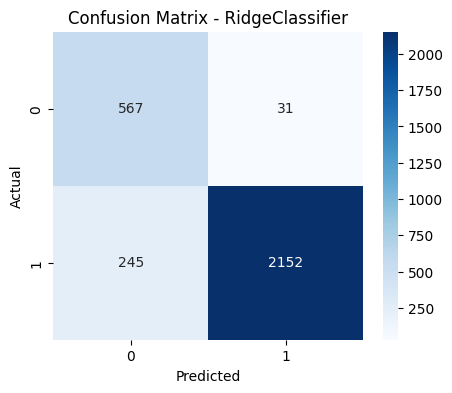

Model: XGBClassifier
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.96      0.97       598
           1       0.99      1.00      0.99      2397

    accuracy                           0.99      2995
   macro avg       0.99      0.98      0.98      2995
weighted avg       0.99      0.99      0.99      2995

Confusion Matrix:
 [[ 575   23]
 [  10 2387]]


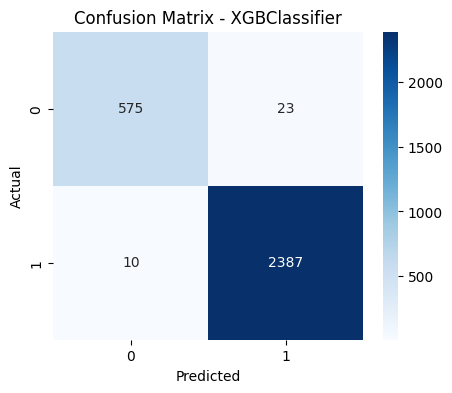

Model: RandomForestClassifier
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99       598
           1       1.00      1.00      1.00      2397

    accuracy                           1.00      2995
   macro avg       0.99      0.99      0.99      2995
weighted avg       1.00      1.00      1.00      2995

Confusion Matrix:
 [[ 591    7]
 [   6 2391]]


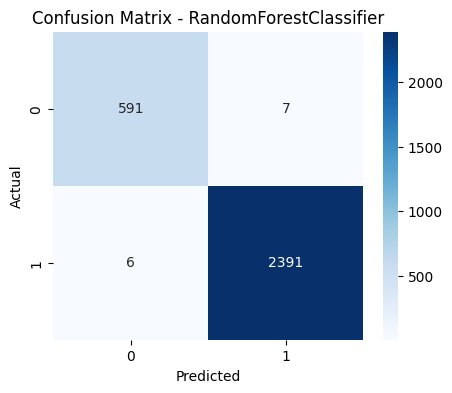

Model: AdaBoostClassifier
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.87      0.92       598
           1       0.97      1.00      0.98      2397

    accuracy                           0.97      2995
   macro avg       0.98      0.93      0.95      2995
weighted avg       0.97      0.97      0.97      2995

Confusion Matrix:
 [[ 520   78]
 [   8 2389]]


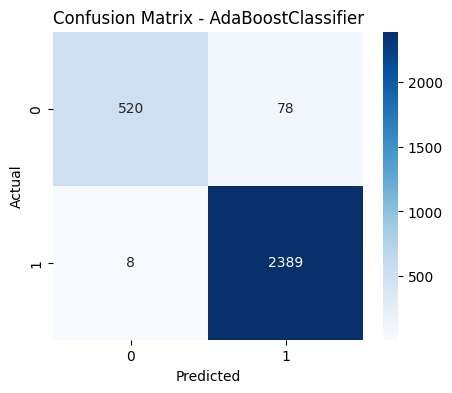

Model: GradientBoostingClassifier
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.98      0.98       598
           1       1.00      1.00      1.00      2397

    accuracy                           0.99      2995
   macro avg       0.99      0.99      0.99      2995
weighted avg       0.99      0.99      0.99      2995

Confusion Matrix:
 [[ 588   10]
 [   8 2389]]


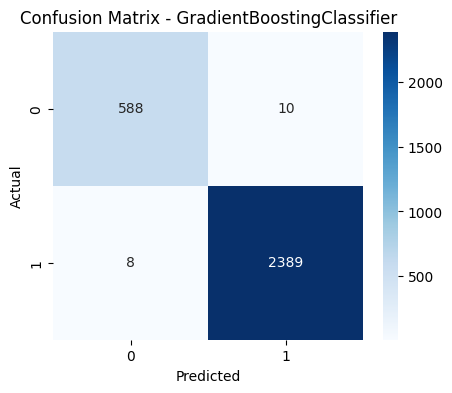

Model: BaggingClassifier
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99       598
           1       1.00      1.00      1.00      2397

    accuracy                           1.00      2995
   macro avg       0.99      0.99      0.99      2995
weighted avg       1.00      1.00      1.00      2995

Confusion Matrix:
 [[ 591    7]
 [   7 2390]]


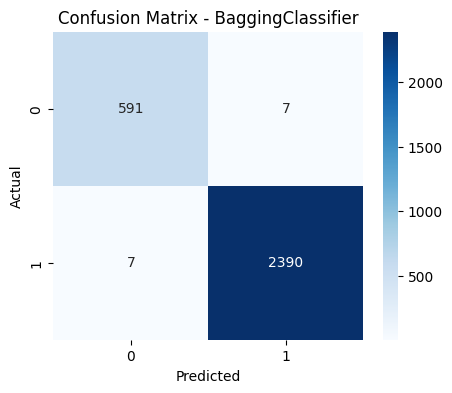

Model: DecisionTreeClassifier
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99       598
           1       1.00      1.00      1.00      2397

    accuracy                           1.00      2995
   macro avg       0.99      0.99      0.99      2995
weighted avg       1.00      1.00      1.00      2995

Confusion Matrix:
 [[ 591    7]
 [   6 2391]]


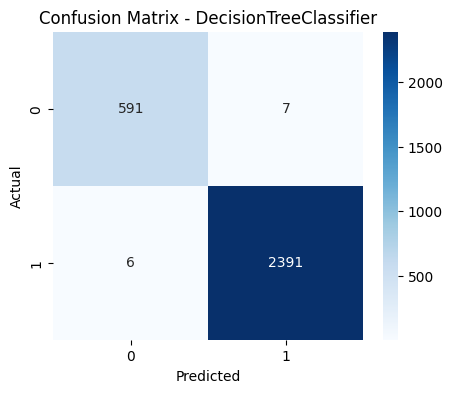

Model: SVC
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.87      0.91       598
           1       0.97      0.99      0.98      2397

    accuracy                           0.96      2995
   macro avg       0.96      0.93      0.94      2995
weighted avg       0.96      0.96      0.96      2995

Confusion Matrix:
 [[ 521   77]
 [  28 2369]]


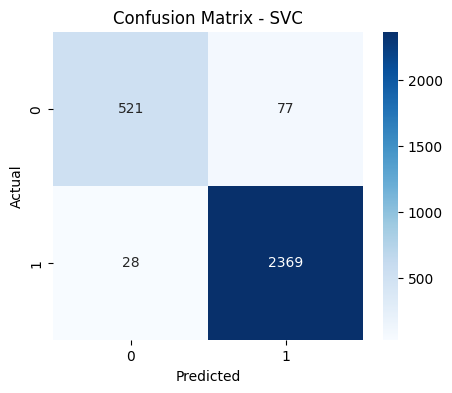

In [49]:
for model in model_li:
    # Reshape X_train and X_test to 2D arrays
    X_train_reshaped = X_train.values.reshape(-1, 1)
    X_test_reshaped = X_test.values.reshape(-1, 1)
    
    model.fit(X_train_reshaped, y_train)
    y_pred = model.predict(X_test_reshaped)

    print(f"Model: {model.__class__.__name__}")
    print("Classification Report:\n", classification_report(y_test, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

    # Plot the confusion matrix
    plt.figure(figsize=(5, 4))
    sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title(f"Confusion Matrix - {model.__class__.__name__}")
    plt.show()